<a href="https://colab.research.google.com/github/IrisFDTD/AI-UNIZAR-course/blob/main/regression/ai_unizar_course_regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">*Introducción a la inteligencia artificial: redes neuronales avanzadas con Tensorflow-Keras*</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Sergio Gutiérrez Rodrigo (sergut@unizar.es)</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Licencia Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional</a>.

```
Sergio G Rodrigo
Departamento de Física Aplicada
Universidad de Zaragoza
Instituto de Nanociencia y Materiales de Aragón (INMA)
C/ Pedro Cerbuna, 12, 50009, Zaragoza, España
```






# **Advanced Neural Networks with TensorFlow-Keras**

---
**Regression with Dense Neural Networks (DNN)**
---
A neural network as a subrogate for the function $y(x)=exp(-x)$, trained in the range $x \in [0,x_{max}]$.

## Main libraries

In [14]:
import keras
from keras.models import Sequential
from keras import Model
from keras.layers import Input,Dense
from keras.optimizers import Adam,SGD

import numpy as np
import matplotlib.pyplot as plt

## Training data

In [15]:
n_train = 20
xmin = 0
xmax = 4

# Definition of the function domain
x_train=np.linspace(xmin,xmax,n_train)

# The real solution y(x) for training evaluation
y_train=np.exp(-x_train)

# Hyperparameters

In [16]:
# Hiperparameters
epochs = 100
lr=0.001

## Model (version 1)

In [17]:
# Definition of the the model
model_1 = Sequential()
model_1.add(Input(shape=(1,)))
model_1.add(Dense(50, activation='elu'))
model_1.add(Dense(50, activation='elu'))
model_1.add(Dense(1, activation=None))

## Model (version 2)

In [18]:
model_2 = Sequential([Input(shape=(1,)),
                   Dense(50, activation='elu'),
                   Dense(50, activation='elu'),
                   Dense(1, activation=None)])

## Model (version 3): Keras functional application programming interface (API)

In [19]:
input=Input(shape=(1,))
x=Dense(50, activation='elu')(input)
x=Dense(50, activation='elu')(x)
output = Dense(1,activation=None)(x)
model_3=Model(input,output)

# Metrics, optimizer and loss

In [20]:
# Choose the model!!
model=model_1

# Definition of the metrics, optimizer and loss
loss= keras.losses.MeanSquaredError()
metrics=keras.metrics.MeanSquaredError()
optimizer= Adam(learning_rate=lr)

model.compile(loss=loss,
          optimizer=optimizer,
          metrics=[metrics])

# Run the model

In [21]:
model.summary()
history=model.fit(x_train, y_train,batch_size=1,epochs=epochs)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 50)                  │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,701 (10.55 KB)

 Trainable params: 2,701 (10.55 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2070 - mean_squared_error: 0.2070
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1049 - mean_squared_error: 0.1049 
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0556 - mean_squared_error: 0.0556 
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0153 - mean_squared_error: 0.0153  
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0283 - mean_squared_error: 0.0283 
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0128 - mean_squared_error: 0.0128 
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0326 - mean_squared_error: 0.0326  
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0215 - mean_squared_error: 0.0215  
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0188 - mean_squared_error: 0.0188 
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0118 - mean_squared_error: 0.0118 
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━

##  Evolution of losses during training

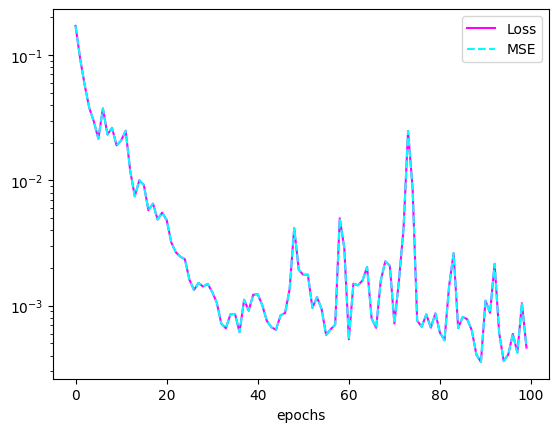

In [22]:
# summarize history for loss and metris
plt.rcParams['figure.dpi'] = 100
plt.plot(history.history['loss'],
         color='magenta',
         label='Loss')
plt.plot(history.history['mean_squared_error'],
         color='cyan',
         label='MSE',linestyle='--')
plt.yscale("log")
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()

# Validation: $y(x)$ vs $y_{NN}(x)$

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


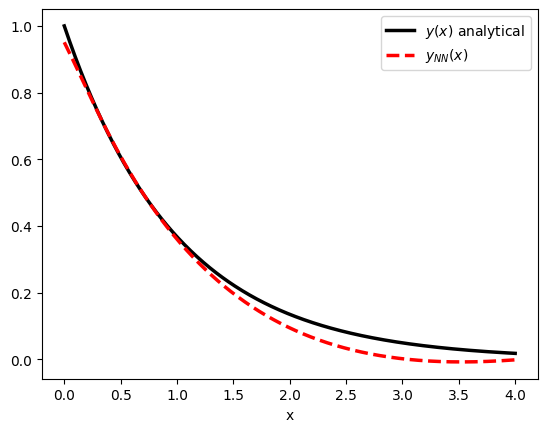

In [23]:
n = 500
x=np.linspace(0,4,n)
y_exact=np.exp(-x)
y_NN=model.predict(x)

# Plot the results
plt.rcParams['figure.dpi'] = 100
plt.plot(x, y_exact, color="black",linestyle='solid',
                     linewidth=2.5,label="$y(x)$ analytical")
plt.plot(x, y_NN, color="red",linestyle='dashed',
                     linewidth=2.5, label="$y_{NN}(x)$")
plt.legend()
plt.xlabel("x")
plt.show()

# Extract weights and bias: a custom feed-forward model

In [24]:
# Obtain all model weights and bias
model.weights

[<KerasVariable shape=(1, 50), dtype=float32, path=sequential_2/dense_9/kernel>,
 <KerasVariable shape=(50,), dtype=float32, path=sequential_2/dense_9/bias>,
 <KerasVariable shape=(50, 50), dtype=float32, path=sequential_2/dense_10/kernel>,
 <KerasVariable shape=(50,), dtype=float32, path=sequential_2/dense_10/bias>,
 <KerasVariable shape=(50, 1), dtype=float32, path=sequential_2/dense_11/kernel>,
 <KerasVariable shape=(1,), dtype=float32, path=sequential_2/dense_11/bias>]

In [25]:
# Let's use Keras functional API: a feed_forward function
def feed_forward(x):
  prediction = []
  for xi in x:
    # Each digit, xi, must be reshaped
    # Cast a to float32 to match the expected type (corrected by IA!!!)
    a=np.array([[xi]]).astype(np.float32)
    #a=np.array([[xi]])  # Working a year later (2023)
    # For each layer in model we use the layer properties to
    # feedforward
    for layer in model.layers[0:]:
       #print("Layer %s" %(layer.name))
       #print(a.shape)
       w=layer.kernel
       b=layer.bias
       #print(w.shape,b.shape)
       z=a@w+b
       a=layer.activation(z)
    prediction.append(a)
  return prediction

# feed_forward in pythonic style
def feed_forward_pythonic(x):
  a=np.reshape(x,(x.shape[0],1)).astype(np.float32)
  print(a.shape)
  for layer in model.layers[0:]:
      w,b=layer.kernel,layer.bias
      a=layer.activation(a@w+b)
  return a

(500, 1)


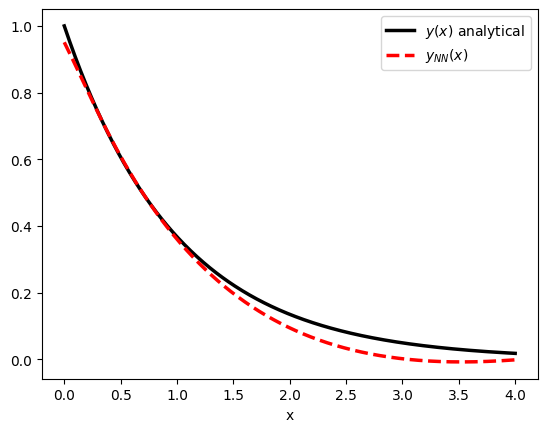

In [26]:
n = 500
x=np.linspace(0,4,n)
y_exact=np.exp(-x)
y_NN=feed_forward_pythonic(x)
y_NN=np.squeeze(y_NN) # Remove trivial dimensions

# Plot the results
plt.rcParams['figure.dpi'] = 100
plt.plot(x, y_exact, color="black",linestyle='solid',
                     linewidth=2.5,label="$y(x)$ analytical")
plt.plot(x, y_NN, color="red",linestyle='dashed',
                     linewidth=2.5, label="$y_{NN}(x)$")
plt.legend()
plt.xlabel("x")
plt.show()